### Import Libraries ###
---

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import Data ###
---

In [8]:
df = pd.read_csv(r'C:\Users\pedro\OneDrive\Desktop\Fraudulent-Actions-Prediction\Data\raw_data\creditcard_2023.csv')

In [9]:
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


### DATA UNDERSTANDING ###
---

In [11]:
df.shape

(568630, 31)

The dataset is composed by :  
    - 568k rows  
    - 31 features  

First idea is that it will be a hard dataset to read/understand because there's no information about the features themselves, due to privacy/data regulations.

In [31]:
df.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
df.dtypes.value_counts() #df.dtypes.groupby(df.dtypes).count()

float64    29
int64       2
Name: count, dtype: int64

In [30]:
df.select_dtypes(include = ['int']).columns

Index(['id', 'Class'], dtype='object')

Out of the 31 variables, only 2 are integers, id and Class.

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,568630.0,2.843145e+05,164149.486122,0.000000,142157.250000,284314.500000,426471.750000,568629.000000
V1,568630.0,-5.118237e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-5.118237e-17,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,1.023647e-16,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,0.000000e+00,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,2.559118e-17,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,2.559118e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,0.000000e+00,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,1.279559e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,0.000000e+00,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062


The fact that for the majority of variables:  
    - Mean +- 0  
    - SD = 1  
It means that these features were already scaled. The amount feature is the only one that will need scaling.

In [42]:
vars = df.select_dtypes(include = ['float'])
vars

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83


## Visual Exploration ## 
___

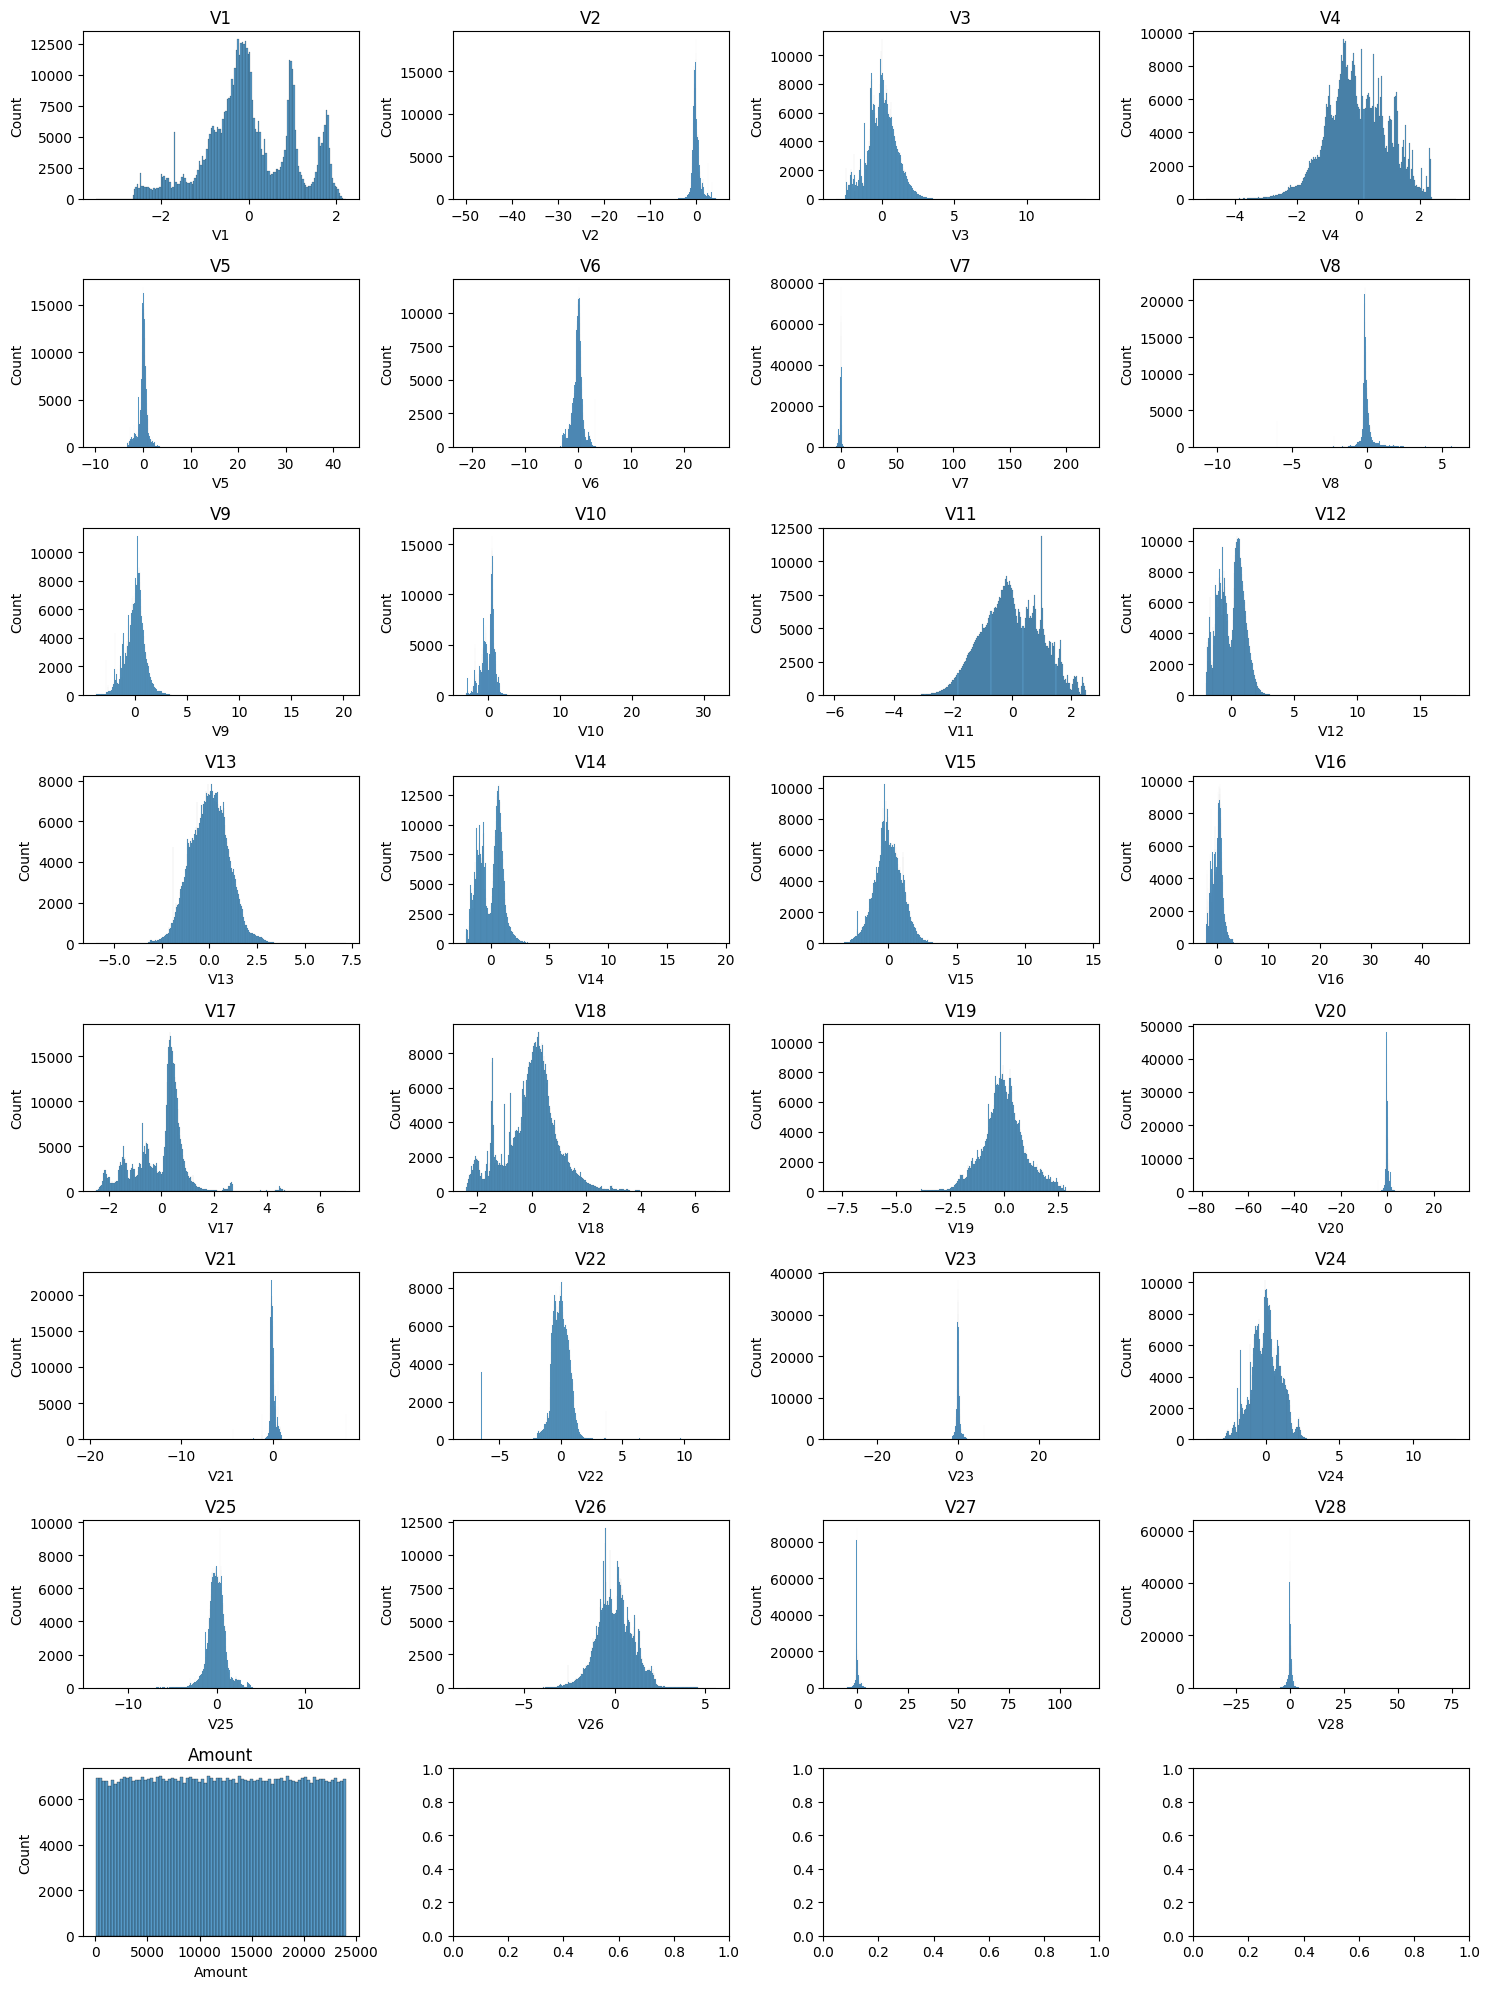

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(15,20))
axes = axes.flatten()
for i, col in enumerate(vars.columns):
    sns.histplot(vars[col], ax = axes[i], edgecolor='black')
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

- Data seems to be highly skewed for most features. However, it has been already scaled, so, some transformations can't be done.  
- 1st approach would be to use Tree based models in modeling as these are more robust against skewness.

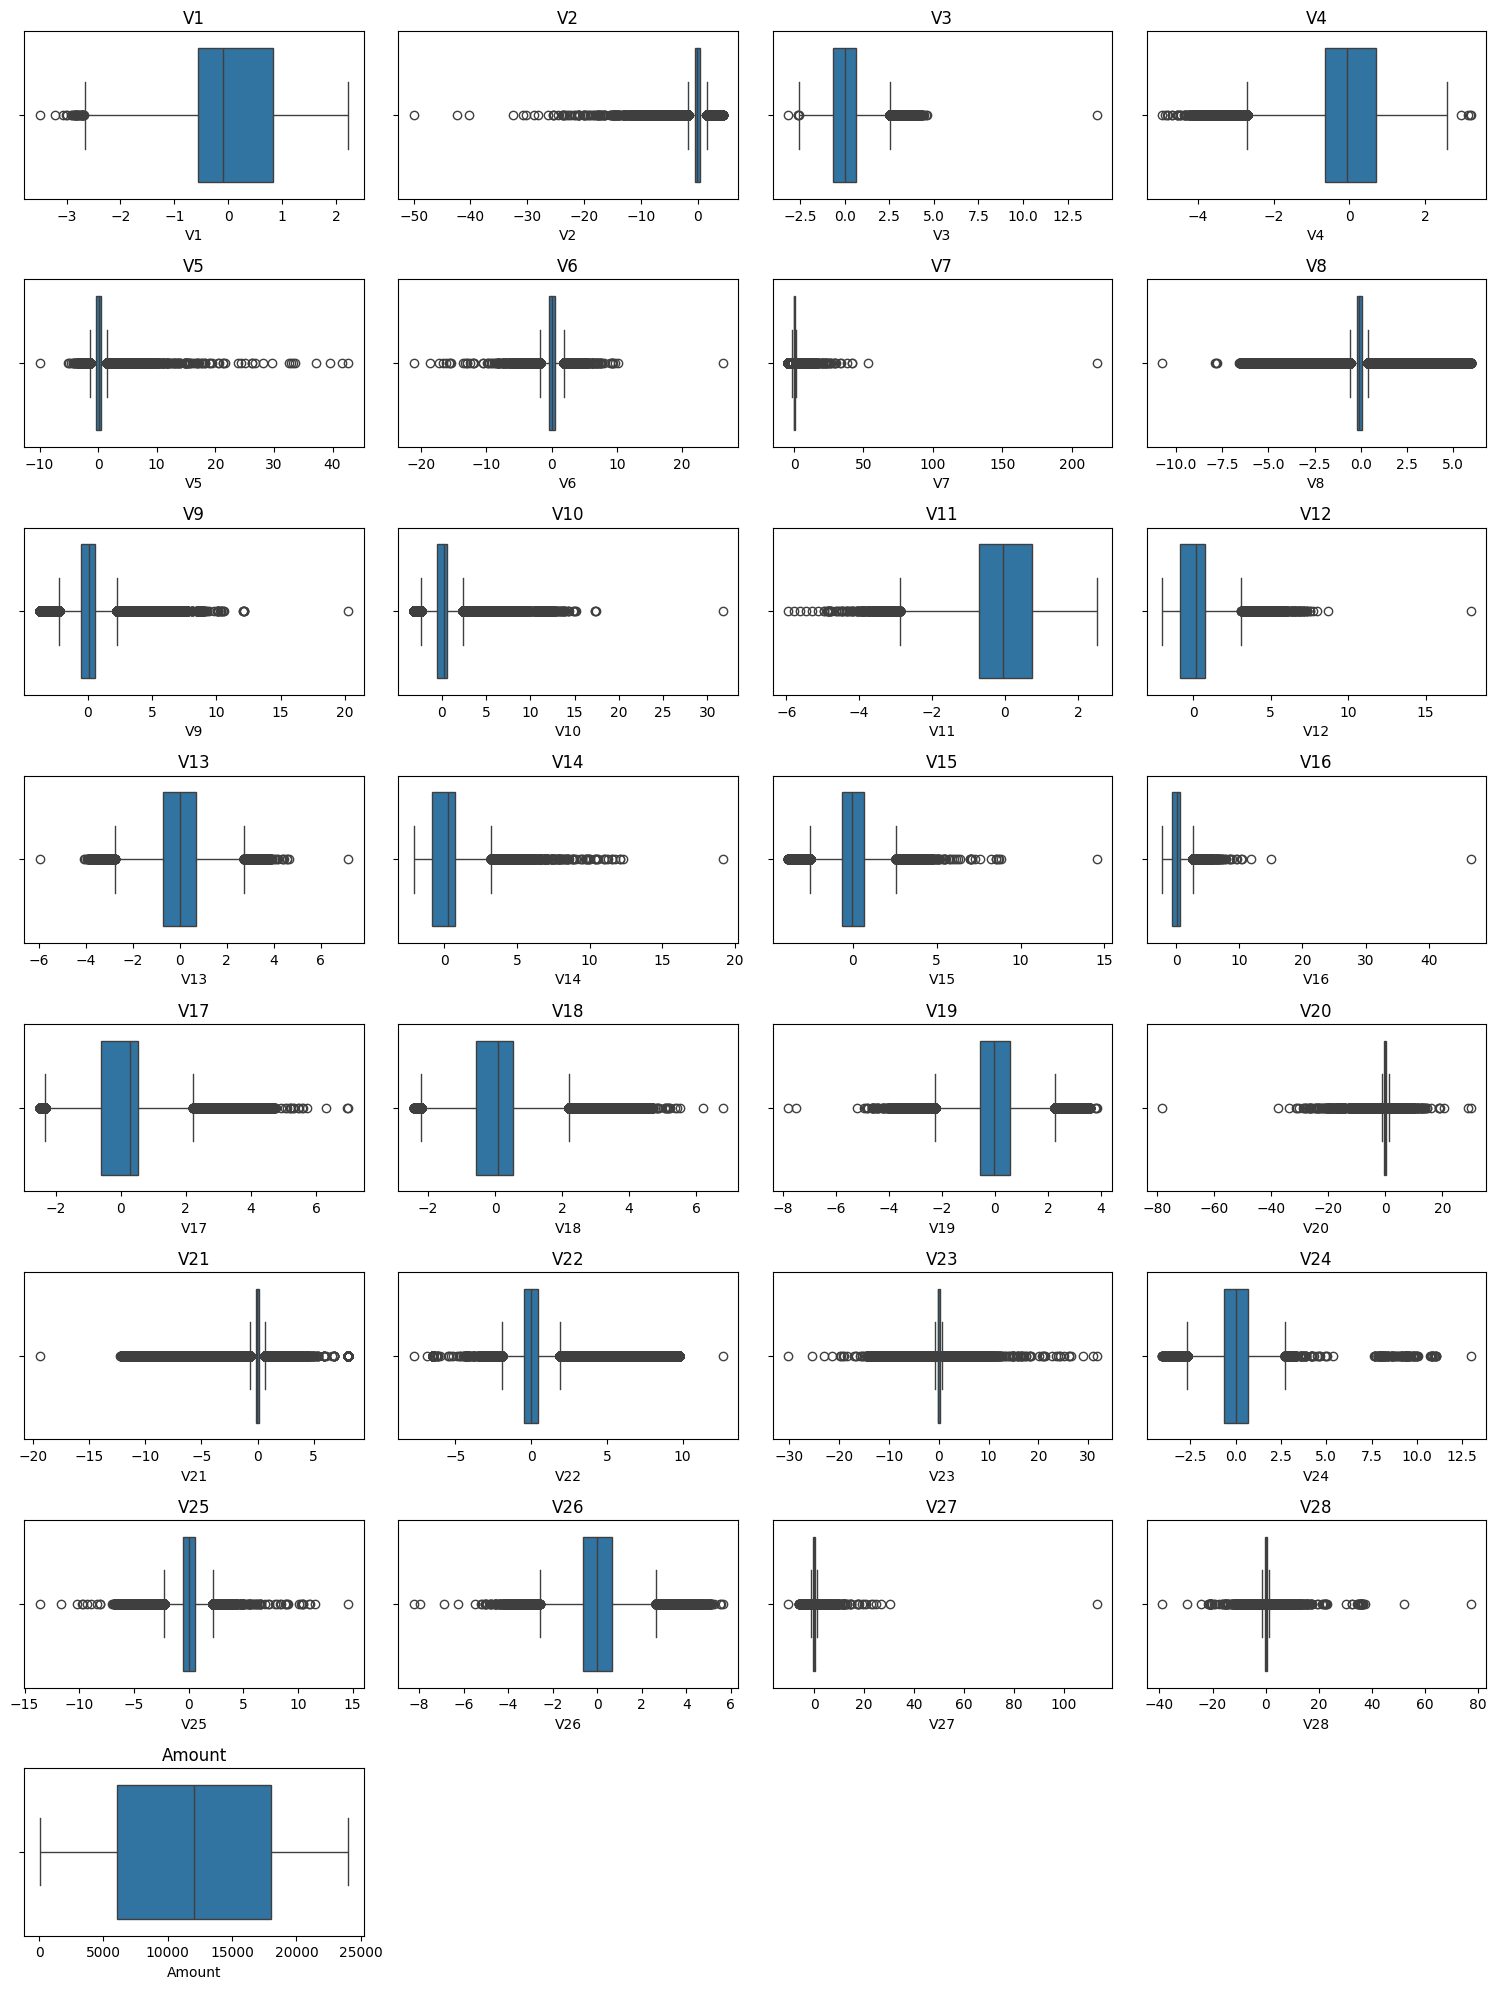

In [74]:
fig, axes = plt.subplots(nrows=8, ncols=4, figsize = (15,20))
axes = axes.flatten()
for i, col in enumerate(vars.columns):
    sns.boxplot(vars[col], ax =axes[i], orient='h')
    axes[i].set_title(col)

for j in range(len(vars.columns), len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()


Through the boxplot analysis, we can identify some clear outliers. This will be addressed in the Data Preparation phase.

In [87]:
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

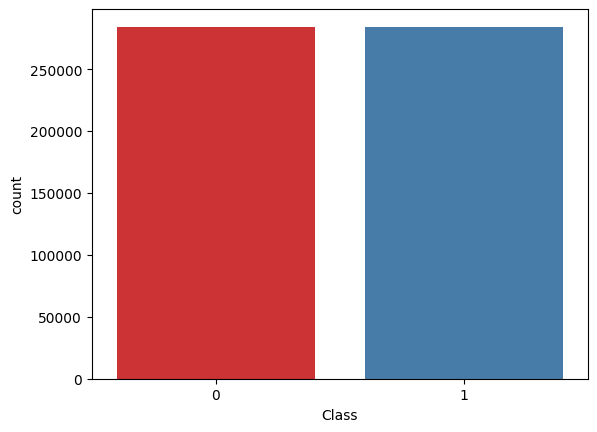

In [95]:
sns.countplot(x=df['Class'], palette='Set1')
plt.show()

In [107]:
print (f'% of Not Fraudulent Transactions: {len(df.loc[df['Class']==0])/len(df)*100:.2f} %')
print (f'% of Fraudulent Transactions: {len(df.loc[df['Class']==1])/len(df)*100:.2f} %')

% of Not Fraudulent Transactions: 50.00 %
% of Fraudulent Transactions: 50.00 %


Dataset well balanced.

## Identify Problems with Data ## 
---

##### Checking for Duplicates #####

In [75]:
df.duplicated().sum()

np.int64(0)

The dataset does not have any duplicates.

#### Missing Values ####

In [79]:
df_na = pd.DataFrame(df.isna().sum(), columns=['n_missing'])

In [80]:
df_na.sort_values('n_missing', ascending=False)

,n_missing
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


The Dataset does not have any missing values.

#### Inconsistencies ####

The dataset does not have any inconsistencies. All variables are numeric.

#### Data Types ####

Data types are all correct

## Relationship Analysis ##
---

In [122]:
df_corr=df.corr(method='spearman')

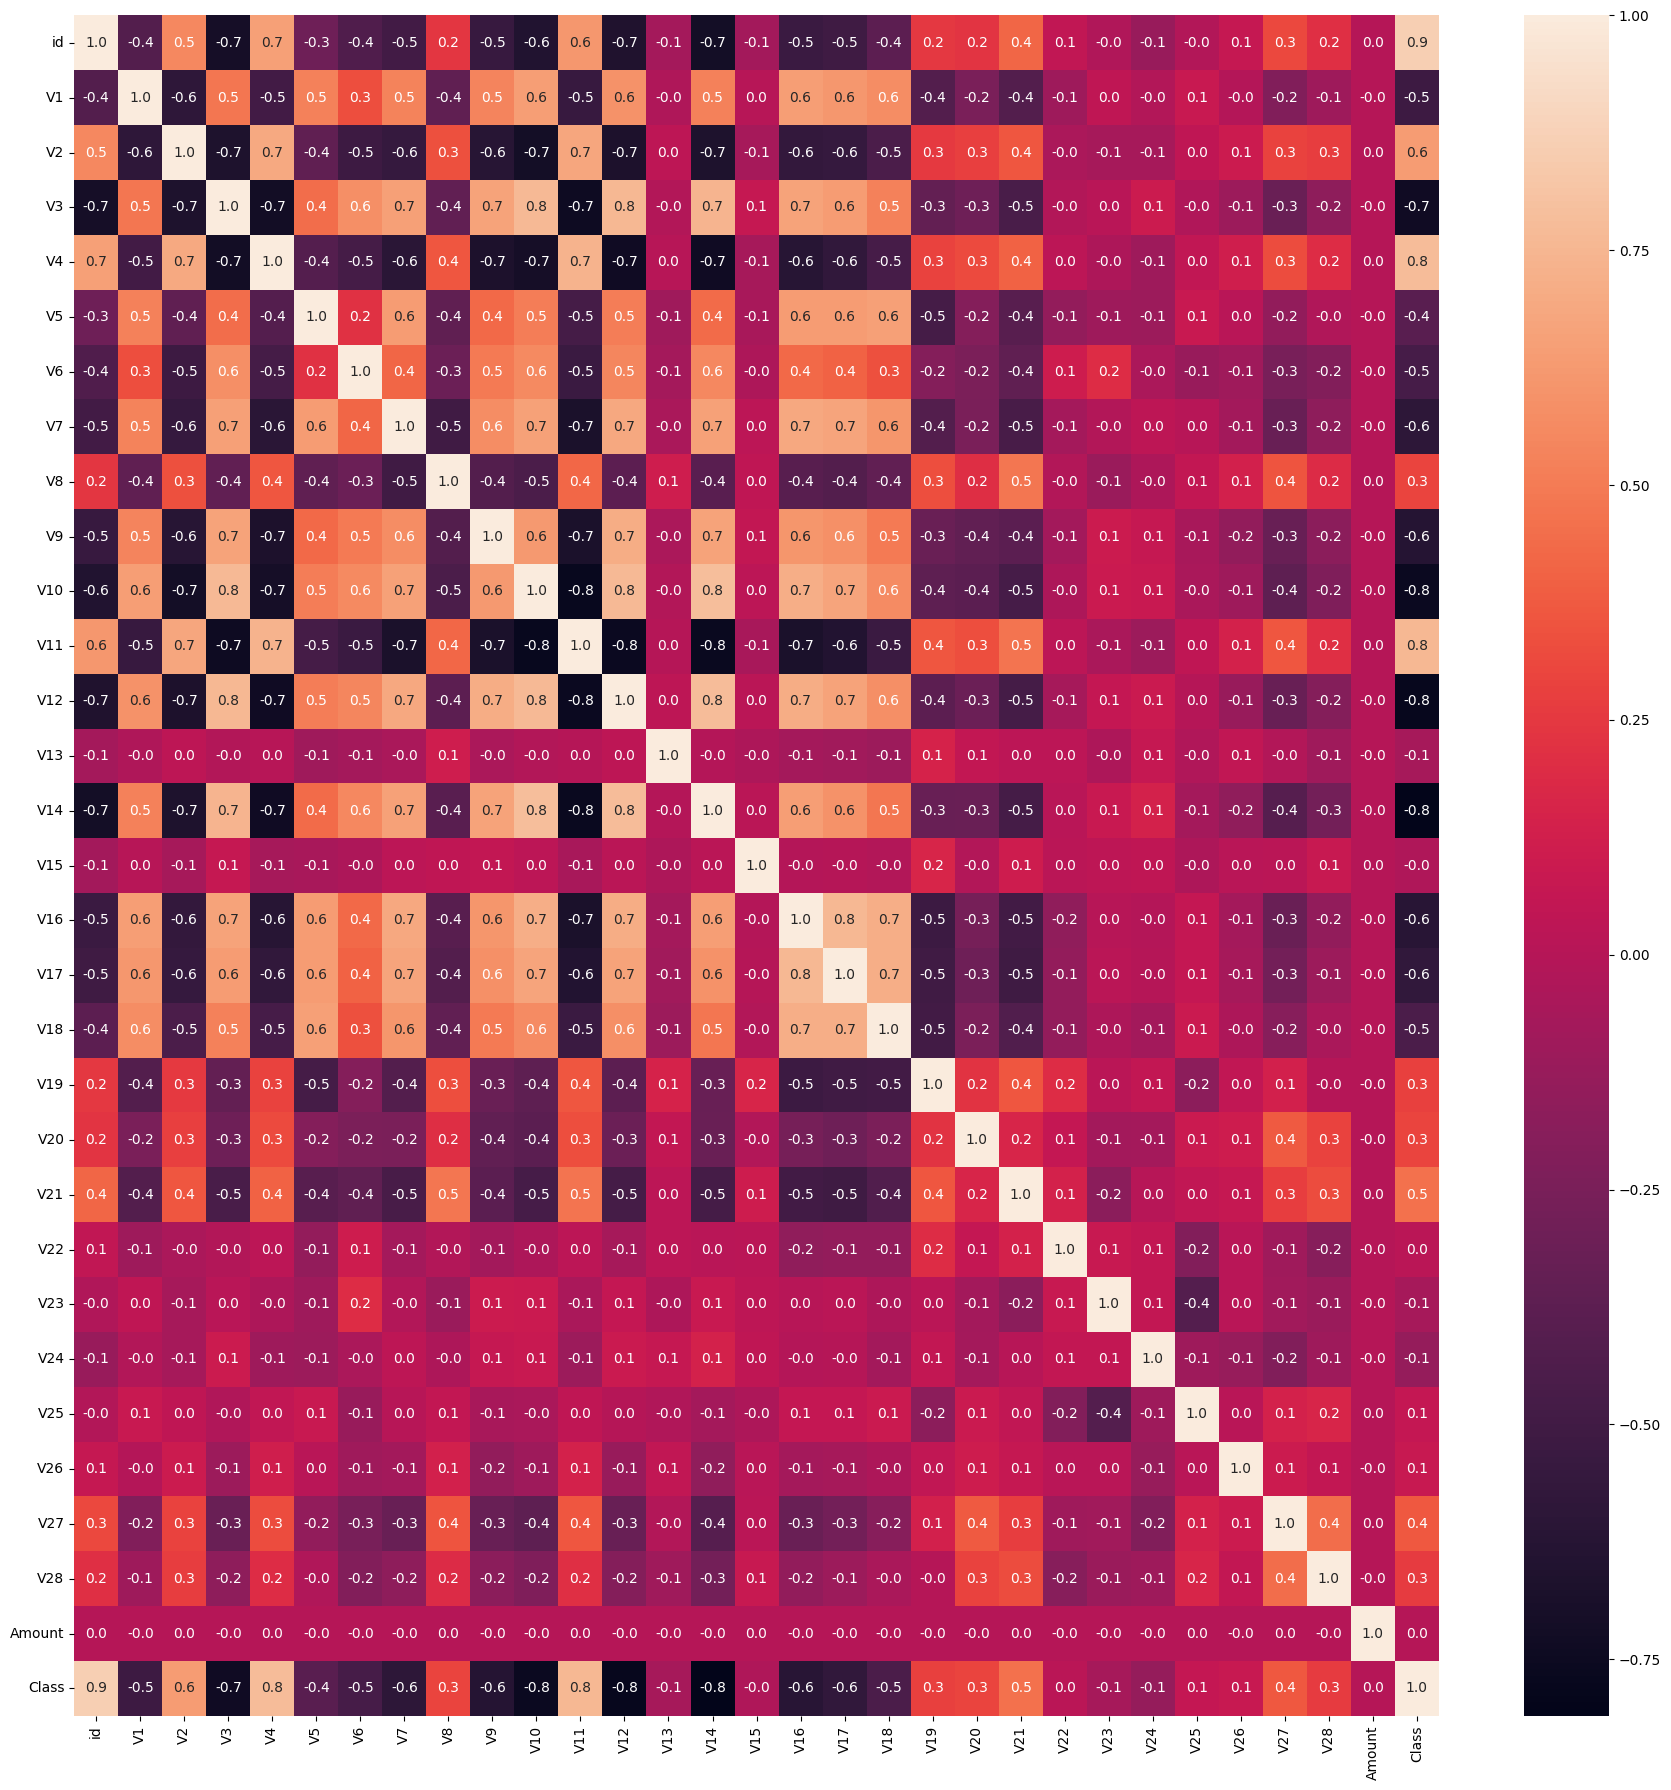

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(df_corr, annot=True, fmt='.1f', cbar=True)
plt.tight_layout()
plt.show()

There are several variables that have high correlation values with a good amount of other variables.

Namely V2, V3, V4, V11.

In general, it appears that V1-V18 have high correlation values (positive or negative) nad V19-V28 have lower correlation values.

In [127]:
df_corr.loc[df_corr['Class'] > 0].sort_values('Class',ascending=False)['Class']

Class     1.000000
id        0.864283
V4        0.778862
V11       0.754951
V2        0.634777
V21       0.461828
V27       0.365438
V8        0.296481
V20       0.295228
V19       0.279498
V28       0.264503
V26       0.079475
V25       0.059838
V22       0.019081
Amount    0.002261
Name: Class, dtype: float64

From the features positively correlated to the Dependent Variable, V4, V11 and V2 standout.

In [129]:
df_corr.loc[df_corr['Class'] < 0].sort_values('Class',ascending=True)['Class']

V14   -0.810303
V12   -0.779501
V10   -0.754268
V3    -0.734373
V9    -0.632380
V16   -0.618732
V7    -0.596388
V17   -0.571833
V1    -0.515954
V6    -0.476268
V18   -0.451667
V5    -0.393023
V24   -0.136682
V13   -0.066306
V23   -0.062283
V15   -0.026760
Name: Class, dtype: float64

From the features negatively correlated to the Dependent Variable, V14, V12, V10, and V3 standout. 

### Documentation of findings and insights from data understanding ###
---

The fact that the names of the variables were omitted due to data privacy reasons, makes it harder to understand the data itself as well as the statistics and general insights about it.

In general, the dataset is pretty clean. Its is well balances and does not require a lot of preprocessing steps, namely:
- Missing Values
- Inconsistencies 
- Wrong Data Types
- Duplicates

Apart from the Variable 'Amount', it appears that all the other independent variables were already scaled. With these 2 observations in mind, it seems the dataset has alrady been preprocessed to some extent.

However, there are still some tasks the need to be done, namely:
- Removal of outliers
- Dimensionality Reduction. There are several highly correlated variables.

